In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=1)
X.shape

(500, 2)

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_cap): #aka cost
    m = X.shape[0]
    loss = -(1/m)*np.sum(y*(np.log(y_cap)) - (1-y)*np.log(1-y_cap))
    return loss

def gradients(X, y, y_cap):
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_cap - y))
    db = (1/m)*np.sum((y_cap - y))
    return dw, db

In [ ]:
def plot_decision_boundary(X, w, b):

    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c

    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.plot(x1, x2, 'r-')

In [ ]:
def normalize(X):

    m, n = X.shape
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

    return X

In [ ]:
def train(X, y, bs, epochs, lr):

    m, n = X.shape
    w = np.zeros((n,1))
    b = 0
    y = y.reshape(m,1)
    x = normalize(X)
    losses = []

    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]

            y_cap = sigmoid(np.dot(xb, w) + b)

            dw, db = gradients(xb, yb, y_cap)

            w -= lr*dw
            b -= lr*db

        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)

    return w, b, losses

In [ ]:
def predict(X):

    x = normalize(X)

    preds = sigmoid(np.dot(X, w) + b)

    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]

    return np.array(pred_class)

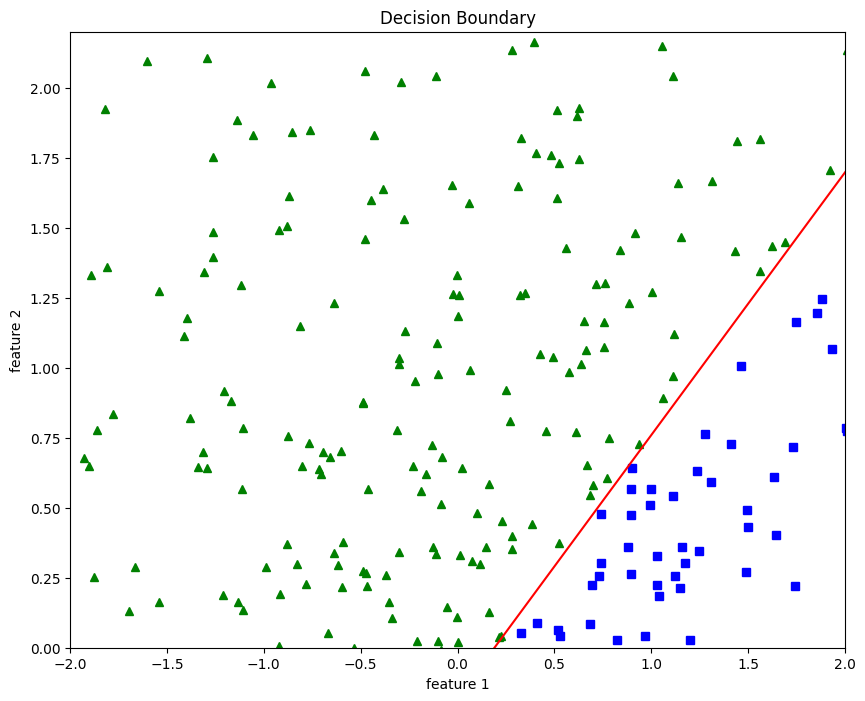

In [ ]:
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
y_pred = predict(X)

x1 = [min(X[:,0]), max(X[:,0])]
m = -w[0]/w[1]
c = -b/w[1]
x2 = m*x1 + c

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y_pred==0], X[:, 1][y_pred==0], "g^")
plt.plot(X[:, 0][y_pred==1], X[:, 1][y_pred==1], "bs")
plt.xlim([-2, 2])
plt.ylim([0, 2.2])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Decision Boundary')
plt.plot(x1, x2, 'r-')